
# Titanic Dataset from Kaggle

_Authors: Sukesh Kumar_

---

## Practice Skills
Binary classification
Python basics


## Objective
complete the analysis of what sorts of people were likely to survive. In particular, apply the tools of machine learning to predict which passengers survived the tragedy.

## Output
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
You should submit a csv file with exactly 418 entries plus a header row.

The output file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.

## Data
Data is divided in two files
- train.csv - Training set. Has the survived column (1 or 0) telling whether the passenger actually survived or not. 
- test.csv - Testing set. Does not have the survived column. Will have to be added as prediction. 
Other details of data can be found at https://www.kaggle.com/c/titanic/data



## Approach

- Review Data
- Cleanse Data
- Create Features
- Try Algorithms
- Tune Algorithms
- Select the best one

## Load things and initialize

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [123]:
train_file = 'data/train.csv'
test_file = 'data/test.csv'
titanic_train = pd.read_csv(train_file, encoding='latin-1',low_memory=False)
titanic_test = pd.read_csv(test_file, encoding='latin-1',low_memory=False)
# copy dataframe before making changes
# train_copy = train_data.copy()


In [48]:
# 
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Some Common functions

In [7]:
# some definitions to be used throuout
eda_columns= ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

# function to print general EDA for each column in a dataframe
def eda(dataframe):
    print ("missing values \n", dataframe.isnull().sum())
    print ("dataframe index \n", dataframe.index)
    print ("dataframe types \n", dataframe.dtypes)
    print ("dataframe shape \n", dataframe.shape)
    print ("dataframe describe \n", dataframe.describe())
    for item in dataframe:
        print(item)
        print (dataframe[item].nunique())

# function to take the dataframe and the column names and print the description of each
def column_describe(dataframe, columns):
    print ("Description of all the columns in the dataframe \n")
    for item in columns:
        print(item)
        print (dataframe[item].describe())
        
        
def plot_hist(dataframe, columns):
    for item in columns:
        print(item)
        dataframe[item].hist()

def plot_bar(dataframe, columns):
    for item in columns:
        print(item)
        dataframe[item].value_counts().plot(kind='bar', figsize=(12,12))
        

def plot_bar_sorted(dataframe, columns):
    for item in columns:
        print(item)
        dataframe[item].value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
        plt.xlabel(item);
        #plt.ylabel(ylabel);
        #plt.title(title);
        
def plot_missing(dataframe):
    # Count the missing values in each column — remember by default, axis=0.
    print(dataframe.isnull().sum())
    dataframe.isnull().sum().plot(kind='bar', figsize=(12,12));
    plt.title('Number of null values per column');
    
#get the unique values of all the columns passed
def find_unique(dataframe, columns):
    print ("Unique Values of all the columns in the dataframe \n")
    for column in columns:
        print(column)
        print (dataframe[column].value_counts().sort_index())


### 1. Clean up any data problems

Load the data.  Fix any problems, if applicable.

In [8]:
eda(titanic_train)

missing values 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=891, step=1)
dataframe types 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
dataframe shape 
 (891, 12)
dataframe describe 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.4

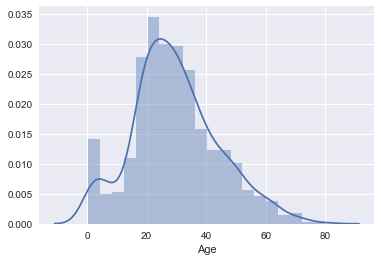

In [124]:
# Check the null value data
# Check the null ages
titanic_train[titanic_train['Age'].isnull()].head(5)
# lets plot age and see the distribution
# titanic_train.boxplot(column="Age")

sns.distplot(titanic_train.Age.dropna())
sns.plt.show()

# if we see here, the age is normally distributed, which means that we should be able to use the mean of the age in the missing ages without skewing the data too much



In [49]:
titanic_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [125]:
# add mean in the missing age values
titanic_train.Age.fillna(round(titanic_train.Age.mean()), inplace=True)

In [51]:
# as a strategy to clean this up, lets assign the null values as average age. 
# Check the null Cabin
titanic_train[titanic_train['Cabin'].isnull()].head(5)
# Cabin is String, and may be different for each family. 
# Not sure how important that is
# Sort by Ticket to check if the Cabin has a relationship with Ticket number
titanic_train.sort_values(["Ticket"], ascending=True)
# this does not give much of a picture. For now, I am ignoring the Cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,30.0,0,0,110465,52.0000,A14,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


Embarked


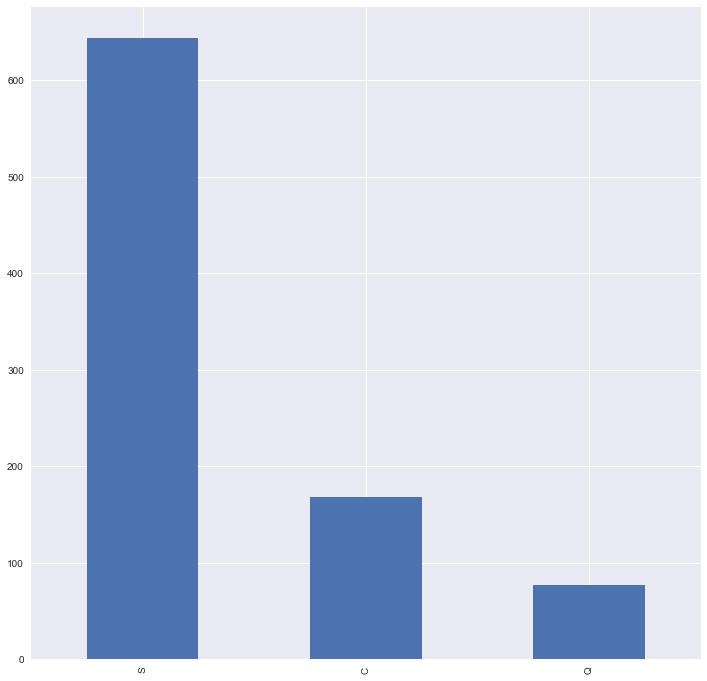

In [52]:

# Check the null Embarked - embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
titanic_train[titanic_train.Embarked.isnull()].head(5)

# lets take the values with more count for this. 
#find_unique(titanic_train, ['Embarked'])
plot_bar(titanic_train, ['Embarked'])

In [126]:
titanic_train.Embarked.fillna('S' , inplace=True)

### Mapping of values to numeric

In [127]:
find_unique(titanic_train, ['Sex','Embarked']) 
titanic_train['Sex_m'] = titanic_train.Sex.map({
    'female':1,
    'male':2})
titanic_train['Embarked_m'] = titanic_train.Embarked.map({
    'C':1,
    'Q':2,
    'S':3})

titanic_train.head()

Unique Values of all the columns in the dataframe 

Sex
female    314
male      577
Name: Sex, dtype: int64
Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_m,Embarked_m
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,3


### Feature Selection
- Score and plot.  
- How do your metrics change?

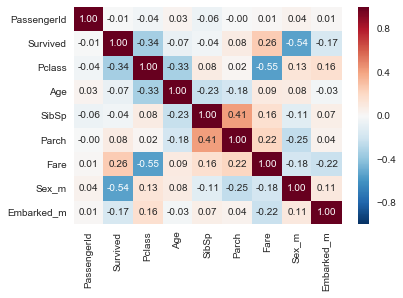

In [62]:

# check some correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(titanic_train.corr(), annot=True, fmt=".2f")


In [71]:

# we see that the Survived is positively correlated with Fare, Parch

# I want to see the impact of survived on other factors like sex, age, pclass
# Sex has two values... so we can have a count of survived==1 and survived ==0 for each Sex
titanic_train.loc[(titanic_train.Sex == 'female')].Survived.value_counts().sort_index()

#titanic_train.loc[(titanic_train.Sex == 'male')].Survived.value_counts().sort_index()

0     81
1    233
Name: Survived, dtype: int64

In [72]:
pd.crosstab(titanic_train["Survived"],titanic_train["Sex"],margins=True)
# this tells that females have higher chaces of survival than males

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [73]:
pd.crosstab(titanic_train["Survived"],titanic_train["Pclass"],margins=True)
# this tells that higher pclass have more changes of survival

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [76]:
pd.crosstab(titanic_train["Survived"],titanic_train[titanic_train.Age>50].Age,margins=True)
# this tells that higher pclass have more changes of survival

Age,51.0,52.0,53.0,54.0,55.0,55.5,56.0,57.0,58.0,59.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,5,3,0,5,1,1,2,2,2,2,...,0,2,3,1,2,1,2,1,0,42
1,2,3,1,3,1,0,2,0,3,0,...,2,0,0,0,0,0,0,0,1,22
All,7,6,1,8,2,1,4,2,5,2,...,2,2,3,1,2,1,2,1,1,64


In [216]:
feature_cols = ['Fare','Sex_m','Pclass','Parch','SibSp','Embarked_m']
data = titanic_train[feature_cols]
label= titanic_train['Survived']

#### Preparing Test

In [94]:
eda(titanic_test)

missing values 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_m            0
Embarked_m       0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=418, step=1)
dataframe types 
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_m            int64
Embarked_m       int64
dtype: object
dataframe shape 
 (418, 13)
dataframe describe 
        PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.216507    0.447368    0.392344   
std     120.810458    0.841838   12.635016    0.896760    0.981429   
min    

In [114]:
#titanic_test[np.isfinite(titanic_test[['Pclass','Parch']]).all()]
titanic_test[np.isinf(titanic_test.Fare)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_m,Embarked_m


In [217]:

titanic_test.Fare.fillna(round(titanic_test.Fare.mean()), inplace=True)
titanic_test.Age.fillna(round(titanic_test.Age.mean()), inplace=True)
titanic_test.Embarked.fillna('S' , inplace=True)

titanic_test['Sex_m'] = titanic_test.Sex.map({
    'female':1,
    'male':2})
titanic_test['Embarked_m'] = titanic_test.Embarked.map({
    'C':1,
    'Q':2,
    'S':3})

### Model Selection

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score  
from sklearn import metrics  
def classify(data, label, model):
    # Split our data
    x_train, x_test, y_train, y_test = train_test_split(data,
                                                          label,
                                                          test_size=0.33,
                                                          random_state=50)
    # Fit the model
    model.fit(x_train, y_train)  
    # Accuracy
    model.score(x_train, y_train)

    # Predictions/probs on the test dataset
    predicted = pd.DataFrame(model.predict(x_test))  
    probs = pd.DataFrame(model.predict_proba(x_test))

    # Store metrics
    accuracy = metrics.accuracy_score(y_test, predicted)  
    roc_auc = metrics.roc_auc_score(y_test, probs[1])  
    confus_matrix = metrics.confusion_matrix(y_test, predicted)  
    classification_report = metrics.classification_report(y_test, predicted)  
    precision = metrics.precision_score(y_test, predicted, pos_label=1)  
    recall = metrics.recall_score(y_test, predicted, pos_label=1)  
    f1 = metrics.f1_score(y_test, predicted, pos_label=1)

    # Evaluate the model using 10-fold cross-validation
    cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)  
    cv_mean = np.mean(cv_scores)
    return accuracy,precision,recall,f1,cv_mean

In [233]:


# Split our data
train, test, train_labels, test_labels = train_test_split(data,
                                                          label,
                                                          test_size=0.33,
                                                          random_state=50)

In [327]:
# get the feature importance
rf = RandomForestClassifier()  
rf.fit(train, train_labels)  
print( "Features sorted by their score:"  )
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), train), reverse=True))  

Features sorted by their score:
[(0.42320000000000002, 'Fare'), (0.32169999999999999, 'Sex_m'), (0.11609999999999999, 'Pclass'), (0.057299999999999997, 'SibSp'), (0.047500000000000001, 'Parch'), (0.034299999999999997, 'Embarked_m')]


In [321]:
# Initialize our classifier
# https://lukesingham.com/whos-going-to-leave-next/
model_lor = LogisticRegression()
accuracy_lor,precision_lor,recall_lor,f1_lor,cv_mean_lor = classify(data,label,model_lor)
model_dtc = DecisionTreeClassifier(max_depth=3)  
accuracy_dtc,precision_dtc,recall_dtc,f1_dtc,cv_mean_dtc = classify(data,label,model_dtc)
model_rfc= RandomForestClassifier()
accuracy_rfc,precision_rfc,recall_rfc,f1_rfc,cv_mean_rfc = classify(data,label,model_rfc)
model_svc = SVC(probability=True)
accuracy_svc,precision_svc,recall_svc,f1_svc,cv_mean_svc = classify(data,label,model_svc)
model_knn = KNeighborsClassifier(n_neighbors=3)
accuracy_knn,precision_knn,recall_knn,f1_knn,cv_mean_knn = classify(data,label,model_knn)
model_gnb = GaussianNB()
accuracy_gnb,precision_gnb,recall_gnb,f1_gnb,cv_mean_gnb = classify(data,label,model_gnb)


# Model comparison
models = pd.DataFrame({  
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [accuracy_lor, accuracy_dtc, accuracy_rfc, accuracy_svc, accuracy_knn, accuracy_gnb],
  'Precision': [precision_lor, precision_dtc, precision_rfc, precision_svc, precision_knn, precision_gnb],
  'recall' : [recall_lor, recall_dtc, recall_rfc, recall_svc, recall_knn, recall_gnb],
  'F1' : [f1_lor, f1_dtc, f1_rfc, f1_svc, f1_knn, f1_gnb],
  'cv_precision' : [cv_mean_lor, cv_mean_dtc, cv_mean_rfc, cv_mean_svc, cv_mean_knn, cv_mean_gnb]
})
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)

,Accuracy,F1,Model,Precision,cv_precision,recall
1,0.800000,0.720379,d.Tree,0.800000,0.666097,0.655172
0,0.789831,0.704762,Logistic,0.787234,0.666097,0.637931
5,0.813559,0.753363,Bayes,0.785047,0.666097,0.724138
2,0.776271,0.682692,r.f.,0.771739,0.666097,0.612069
4,0.766102,0.669856,kNN,0.752688,0.666097,0.603448
3,0.745763,0.669604,SVM,0.684685,0.666097,0.655172


In [304]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier

# Initialize our classifier
#model = GaussianNB() #0.813559322034
#model = LogisticRegression() # 0.789830508475
#model= RandomForestClassifier() #0.796610169492
#model = SVC(probability=True) #0.745762711864
#model = KNeighborsClassifier(n_neighbors=3) # 0.766101694915
model = DecisionTreeClassifier(max_depth=3)  



# Train our classifier
fitted = model.fit(train, train_labels)

In [305]:
preds = model.predict(test)
print(preds)

[1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0]


In [306]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.8


In [307]:
X_test = titanic_test[feature_cols]
y_test = model.predict(X_test)

In [308]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

### Create File

In [309]:
X_test['Survived'] = y_test

titanic_test_merged = pd.merge(titanic_test,X_test[['Survived']] ,how = 'left',left_index = True, right_index = True)

C:\Users\b003536\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [310]:
titanic_out = titanic_test_merged[['PassengerId','Survived']]

In [311]:
titanic_out.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [312]:
titanic_out.to_csv('titanic_submission_sukesh_kumar_dtc.csv', encoding='utf-8', index=False)